<a href="https://colab.research.google.com/github/flashdrive452/Insurance_Predict/blob/main/Insurance_Premium_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np

In [ ]:
tf.__version__

'2.7.0'

In [ ]:
# Read CSV from Google drive
insurance = pd.read_csv("/content/drive/MyDrive/TF Data/insurance.csv")

In [ ]:
insurance.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [ ]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
import matplotlib.pyplot as plt

(array([574.,   0., 324.,   0., 240.,   0., 157.,   0.,  25.,  18.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

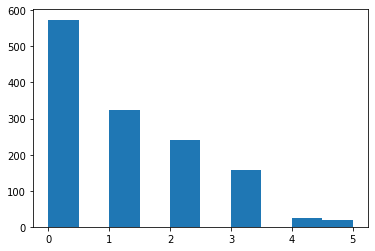

In [ ]:
plt.hist(insurance.children)

In [ ]:
plt.bar(insurance.bmi, insurance.charges, color='cyan')

<BarContainer object of 1338 artists>

<BarContainer object of 1338 artists>

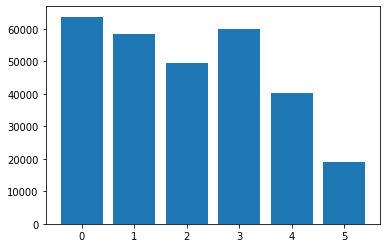

In [ ]:
plt.bar(insurance.children, insurance.charges)

In [ ]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split

In [ ]:
# Make column Transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age","bmi","children"]), # Normalize columns between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex","smoker","region"]) 
)

# Create X and y datasets
X = insurance.drop(["charges"], axis=1)
y = insurance["charges"]

# Split X and y into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit column transformer to X_train
ct.fit(X_train)

# Transform X_train and X_test
X_train = ct.transform(X_train)
X_test = ct.transform(X_test)

In [ ]:
pd.DataFrame(X_train).shape

(1070, 11)

In [ ]:
# Now let's create a model using the Functional API

tf.random.set_seed(42)

# Make a model
inputs = tf.keras.layers.Input(shape=(11))
x = tf.keras.layers.Dense(100)(inputs)
x = tf.keras.layers.Dense(100)(x)
outputs = tf.keras.layers.Dense(1)(x)
model_insurance = tf.keras.Model(inputs, outputs, name="output_layer")

# Compile the model
model_insurance.compile(loss="mae",
                        optimizer="Nadam",
                        metrics=["mae"])

# Fit the model
model_insurance.fit(X_train, y_train, epochs=100, verbose=0)

In [ ]:
model_insurance.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3161.3354 - mae: 3161.3354


[3161.33544921875, 3161.33544921875]

In [ ]:
y_pred = model_insurance.predict(X_test)
y_pred.shape

(268, 1)

In [ ]:
x0 = tf.reshape(tf.constant(np.array(np.arange(1, 269))), shape=(268, 1))
x0.shape

TensorShape([268, 1])

In [ ]:
y_test = tf.reshape(tf.constant(y_test), shape=(268,1))

In [ ]:
insurance_preds = pd.DataFrame({'x0':x0[:, 0],
              'y_test':y_test[:, 0],
              'y_pred':y_pred[:, 0]
              })
insurance_preds.head(10)

,x0,y_test,y_pred
0,1,9095.06825,9284.991211
1,2,5272.17580,6039.440430
2,3,29330.98315,44523.730469
3,4,9301.89355,9205.123047
4,5,33750.29180,32344.755859
5,6,4536.25900,5642.125000
6,7,2117.33885,1164.494507
7,8,14210.53595,13367.417969
8,9,3732.62510,3588.903320
9,10,10264.44210,10144.107422


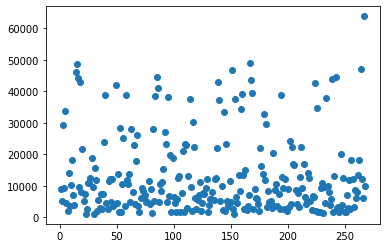

In [ ]:
plt.scatter(insurance_preds["x0"], insurance_preds["y_test"])